In [2]:
import pandas
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pickle, json

import matplotlib as mpl
Paper_style = json.load(open("Paperstyle.json",'r'))
mpl.style.use(Paper_style)
import matplotlib.transforms as mtransforms

mpl.rcParams["figure.autolayout"] = False


In [3]:
a = pandas.read_csv("wpd_datasets.csv")

In [4]:
a.head()

,T1,SEE1,T2,SEE2,T3,SEE3
0,0.027306,0.723610,0.023271,0.690303,0.023271,0.670845
1,0.017891,0.710263,0.007131,0.676008,0.007131,0.655229
2,0.007131,0.699585,0.055551,0.703803,0.050171,0.680856
3,0.060931,0.740161,0.079761,0.726832,0.071691,0.695672
4,0.082451,0.765254,0.071691,0.714126,0.098591,0.718229


In [5]:
T1 = a["T1"]
SEE1 = a["SEE1"]

T2 = a["T2"]
SEE2 = a["SEE2"]

T3 = a["T3"]
SEE3 = a["SEE3"]


/home/tavant/these/code/venv/stand/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater


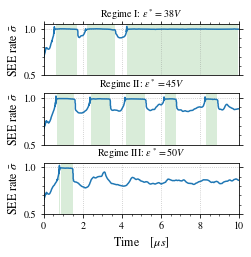

In [7]:
fig, [ax1,ax2,ax3] = plt.subplots(3, figsize = (3.5,3.5))

ax1.plot(T1,SEE1,linewidth = 1.5)
ax1.set_title(r'Regime I: $\epsilon^* = 38 V$', size = 10)

ax2.plot(T2,SEE2,linewidth = 1.5)
ax2.set_title(r'Regime II: $\epsilon^* = 45 V$', size = 10)

ax3.plot(T3,SEE3,linewidth = 1.5)
ax3.set_title(r'Regime III: $\epsilon^* = 50 V$', size = 10)
ax3.set_xlabel("Time $ \quad [\mu s]$")

for ax in [ax1, ax2]:
    ax.tick_params(axis="x",which="both",
        bottom=False,      # ticks along the bottom edge are off
        labelbottom=False,  # labels along the bottom edge are off
                  )
for ax in [ax3, ax2]:
    ax.tick_params(axis="x",which="both",
        top=False,         # ticks along the top edge are off
       # labelbottom=False,  # labels along the bottom edge are off
                  )
    
for ax in [ax1,ax2,ax3]:
    ax.set_ylabel(r"SEE rate $\bar{\sigma}$")
    ax.set_ylim(0.5,1.05)
    ax.set_xlim(0,10)
    
    line = ax.lines[0] # get the first line, there might be more
    x = line.get_xdata()
    y = line.get_ydata()
    trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes) #transform the data coords to the axis coords
    theta = 0.982
    ax.fill_between(x, 0, 1, where=y > theta, facecolor='green', alpha=0.15, transform=trans)
    
plt.subplots_adjust(hspace = 0.35   # the amount of height reserved for space between subplots,
               # expressed as a fraction of the average axis height
                   )

plt.savefig("../images/comparaison_3_regimes.pdf",bbox_inches="tight")